In [1]:
# list all files in image_dir
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from em_targeting.em_targeting.scripts.flip_fxn_tst import test 
from em_targeting.draw_polygon import read_image, mask_to_tiles
from em_targeting.mask_processing import postprocess_mask
import napari
from skimage import io, measure
from skimage.filters import threshold_otsu, gaussian
from skimage.morphology import binary_closing, disk, binary_dilation
from tqdm import tqdm
import time
import seaborn as sns 
import pandas as pd

In [2]:
image_dir = Path("/Users/thomasathey/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/jellyfish-imaging/24_12_04_multi_res/images")

# list name of all folders in image_dir
folders = [f for f in os.listdir(image_dir) if os.path.isdir(os.path.join(image_dir, f))]

# Refine ground truth

In [4]:
for res in tqdm(folders):
    if res == '4':
        continue
    
    path_dir = image_dir / res
    path_ims = [f for f in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir, f))]
    path_ims = [path_dir / f for f in path_ims if f.endswith('.tif') and "_gt" not in f]
    path_segs = [str(f).replace(".tif", "_tissue_gt.tif") for f in path_ims]

    for path_im, path_seg in tqdm(zip(path_ims, path_segs), leave=False):
        im = read_image(path_im)
        seg = read_image(path_seg)

        mask = seg.copy()

        # gaussian filter
        im_thresh = gaussian(im, sigma=3)
        # # select intensities for thresholding
        intensities = im_thresh[seg > 0]
        thresh = threshold_otsu(intensities)
        mask[im_thresh > thresh] = 0

        mask = measure.block_reduce(mask, (2, 2), np.max)

        mask = binary_closing(mask, footprint=disk(8))
        mask = binary_dilation(mask, disk(12))

        mask = np.repeat(mask, 2, axis=0)
        mask = np.repeat(mask, 2, axis=1)
        mask[seg == 0] = 0

        # viewer = napari.Viewer()
        # viewer.add_image(im)
        # viewer.add_labels(mask)

        # napari.run()
        # answer = input("Ok?")

        path_seg_new = path_seg.replace(".tif", "_process.tif")
        io.imsave(path_seg_new, mask.astype(np.uint8))

  0%|          | 0/6 [00:00<?, ?it/s]/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_41732/1943300817.py:40: UserWarning: /Users/thomasathey/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/jellyfish-imaging/24_12_04_multi_res/images/16/p16_Section_003_r02_c02_tissue_gt_process.tif is a low contrast image
  io.imsave(path_seg_new, mask.astype(np.uint8))
/var/folders/gy/jk_d3cx54vj18w9sm6x3sg_80000gn/T/ipykernel_41732/1943300817.py:40: UserWarning: /Users/thomasathey/Library/CloudStorage/OneDrive-MassachusettsInstituteofTechnology/jellyfish-imaging/24_12_04_multi_res/images/16/p16_Section_005_r01_c01_tissue_gt_process.tif is a low contrast image
  io.imsave(path_seg_new, mask.astype(np.uint8))
/var/folders/gy/jk_d

## View GT

In [8]:
res = '123'

path_dir = image_dir / res
path_ims = [f for f in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir, f))]
path_ims = [path_dir / f for f in path_ims if f.endswith('.tif') and "_gt" not in f]
path_segs = [str(f).replace(".tif", "_tissue_gt_process.tif") for f in path_ims]

for path_im, path_seg in tqdm(zip(path_ims, path_segs), leave=False):
    im = read_image(path_im)
    seg = read_image(path_seg)

    viewer = napari.Viewer()
    viewer.add_image(im, name=path_im.stem)
    viewer.add_labels(seg)
    napari.run()

0it [00:00, ?it/s]/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
1it [00:03,  3.29s/it]/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
2it [00:04,  2.20s/it]/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
3it [00:06,  1.91s/it]/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exc

# How long to image slice?

## Small slice

In [3]:
res = 123
plot = False
dt = 1 #dwell time in microseconds

In [7]:
path_dir = image_dir / str(res)
path_ims = [f for f in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir, f))]
path_ims = [path_dir / f for f in path_ims if f.endswith('.tif') and "_gt" not in f]
path_segs = [str(f).replace(".tif", "_tissue_gt.tif") for f in path_ims]

### Area

/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Pixels: 0.0h 19.0m 7.7s for area of 1.84e-02 mm^2
Tiles: 0.0h 29.0m 12.2s for area of 2.80e-02 mm^2
Pixels: 0.0h 17.0m 0.0s for area of 1.63e-02 mm^2
Tiles: 0.0h 27.0m 16.5s for area of 2.62e-02 mm^2
Pixels: 0.0h 16.0m 27.7s for area of 1.58e-02 mm^2
Tiles: 0.0h 26.0m 37.3s for area of 2.56e-02 mm^2
Pixels: 0.0h 14.0m 50.6s for area of 1.42e-02 mm^2
Tiles: 0.0h 25.0m 5.4s for area of 2.41e-02 mm^2
Pixels: 0.0h 16.0m 28.8s for area of 1.58e-02 mm^2
Tiles: 0.0h 26.0m 29.7s for area of 2.54e-02 mm^2


<Axes: xlabel='Method', ylabel='Imaging Time with 1 us Dwell Time'>

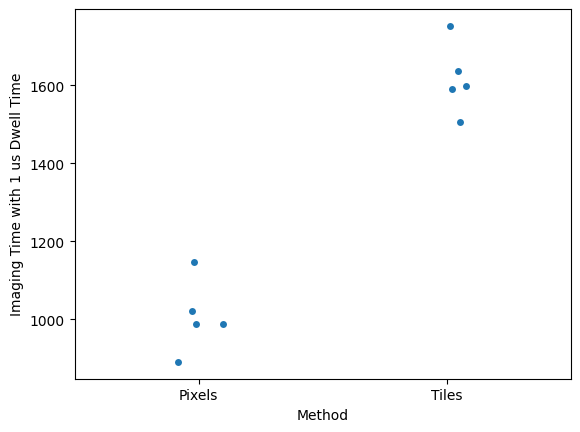

In [10]:
tile_size = (12288, 12288)
ds_factor = res // 4

data_time = []
data_method = []

for path_im, path_seg in zip(path_ims, path_segs):
    im = read_image(path_im)
    seg_px = read_image(path_seg)
    seg_tiles = mask_to_tiles(seg_px, ds_factor)

    for name, seg in zip(["Pixels", "Tiles"], [seg_px, seg_tiles]):
        area = np.sum(seg > 0)
        area_nm2 = area * res**2
        area_mm = area_nm2 / 1e6**2
        area_px = area_nm2 / 4**2
        time_s = area_px * dt *1e-6

        data_time.append(time_s)
        data_method.append(name)

        # convert time_s to hours, minutes, seconds
        time_h = time_s // 3600
        time_s = time_s % 3600
        time_m = time_s // 60
        time_s = time_s % 60

        print(f"{name}: {time_h}h {time_m}m {time_s:.1f}s for area of {area_mm :.2e} mm^2")


    if plot:
        viewer = napari.Viewer()
        viewer.add_image(im, name=path_im.stem)
        viewer.add_labels(seg_px, name="Pixels")
        viewer.add_labels(seg_tiles, name="Tiles")
        napari.run()

data = {f"Imaging Time with {dt} us Dwell Time": data_time, "Method": data_method}
df = pd.DataFrame(data)
sns.stripplot(data, x="Method", y=f"Imaging Time with {dt} us Dwell Time")


# Automatic segmentation

In [6]:
res = 123
plot = True

In [7]:
path_dir = image_dir / str(res)
path_ims = [f for f in os.listdir(path_dir) if os.path.isfile(os.path.join(path_dir, f))]
path_ims = [path_dir / f for f in path_ims if f.endswith('.tif') and "_gt" not in f]
path_segs = [str(f).replace(".tif", "_tissue_gt.tif") for f in path_ims]
path_preds = [str(f).replace(".tif", "_Simple Segmentation.h5") for f in path_ims]


In [8]:
tile_size = (12288, 12288)
ds_factor = res // 4

data_time = []
data_method = []

for path_im, path_seg, path_pred in zip(path_ims, path_segs, path_preds):
    if not os.path.isfile(path_pred):
        continue
    im = read_image(path_im)
    seg_px = read_image(path_seg)
    seg_tiles = mask_to_tiles(seg_px, ds_factor)
    seg_pred = read_image(path_pred)
    seg_pred_postprocess = postprocess_mask(seg_pred)

    # for name, seg in zip(["Pixels", "Tiles"], [seg_px, seg_tiles]):
    #     area = np.sum(seg > 0)
    #     area_nm2 = area * res**2
    #     area_mm = area_nm2 / 1e6**2
    #     area_px = area_nm2 / 4**2
    #     time_s = area_px * dt *1e-6

    #     data_time.append(time_s)
    #     data_method.append(name)

    #     # convert time_s to hours, minutes, seconds
    #     time_h = time_s // 3600
    #     time_s = time_s % 3600
    #     time_m = time_s // 60
    #     time_s = time_s % 60

    #     print(f"{name}: {time_h}h {time_m}m {time_s:.1f}s for area of {area_mm :.2e} mm^2")


    if plot:
        viewer = napari.Viewer()
        viewer.add_image(im, name=path_im.stem)
        viewer.add_labels(seg_px, name="Pixels")
        viewer.add_labels(seg_tiles, name="Tiles")
        viewer.add_labels(seg_pred, name="Predictions")
        viewer.add_labels(seg_pred_postprocess, name="Predictions Postprocessed")
        napari.run()

    

# data = {f"Imaging Time with {dt} us Dwell Time": data_time, "Method": data_method}
# df = pd.DataFrame(data)
# sns.stripplot(data, x="Method", y=f"Imaging Time with {dt} us Dwell Time")


/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Removing small objects
Closing
Dilation
Removing small objects


/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Removing small objects
Closing
Dilation
Removing small objects


/Users/thomasathey/Documents/shavit-lab/jellyfish/.venv/lib/python3.12/site-packages/PIL/Image.py:3406: DecompressionBombWarning: Image size (150994944 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


Removing small objects
Closing
Dilation
Removing small objects
